# Time Series Stock Analysis

This was done for an assignment for foundations of data science.

In [3]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
#import pandas_datareader.data as web
#import quandl

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns


In [3]:
# Make sure you adjust the start and end date accordingly
# so that the start date = today date

start = datetime.datetime(2013, 3, 12)
end = datetime.datetime(2019, 3, 12)



In [8]:
## Download the data from Quandl
amzn = web.DataReader('WIKI/AMZN', 'quandl', start, end)
fb = web.DataReader('WIKI/FB', 'quandl', start, end)
ibm = web.DataReader('WIKI/IBM', 'quandl', start, end)
mmm = web.DataReader('WIKI/MMM', 'quandl', start, end)

In [9]:
# take a look at the AMZN dataset
amzn.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,1572.40,1575.96,1482.32,1497.05,6793279.0,0.0,1.0,1572.40,1575.96,1482.32,1497.05,6793279.0
2018-03-26,1530.00,1556.99,1499.25,1555.86,5547618.0,0.0,1.0,1530.00,1556.99,1499.25,1555.86,5547618.0
2018-03-23,1539.01,1549.02,1495.36,1495.56,7843966.0,0.0,1.0,1539.01,1549.02,1495.36,1495.56,7843966.0
2018-03-22,1565.47,1573.85,1542.40,1544.10,6177737.0,0.0,1.0,1565.47,1573.85,1542.40,1544.10,6177737.0
2018-03-21,1586.45,1590.00,1563.17,1581.86,4667291.0,0.0,1.0,1586.45,1590.00,1563.17,1581.86,4667291.0


In [10]:
# take a look at the FB dataset
fb.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0
2018-03-26,160.82,161.10,149.02,160.06,125438294.0,0.0,1.0,160.82,161.10,149.02,160.06,125438294.0
2018-03-23,165.44,167.10,159.02,159.39,52306891.0,0.0,1.0,165.44,167.10,159.02,159.39,52306891.0
2018-03-22,166.13,170.27,163.72,164.89,73389988.0,0.0,1.0,166.13,170.27,163.72,164.89,73389988.0
2018-03-21,164.80,173.40,163.30,169.39,105350867.0,0.0,1.0,164.80,173.40,163.30,169.39,105350867.0


In [11]:
# take a loot at the IBM dataset
ibm.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,153.95,154.8697,151.160,151.91,3810994.0,0.0,1.0,153.95,154.8697,151.160,151.91,3810994.0
2018-03-26,151.21,153.6570,150.280,153.37,4038586.0,0.0,1.0,151.21,153.6570,150.280,153.37,4038586.0
2018-03-23,152.25,152.5800,148.541,148.89,4389015.0,0.0,1.0,152.25,152.5800,148.541,148.89,4389015.0
2018-03-22,155.00,155.2499,152.000,152.09,4617371.0,0.0,1.0,155.00,155.2499,152.000,152.09,4617371.0
2018-03-21,156.57,158.2000,155.920,156.69,3240695.0,0.0,1.0,156.57,158.2000,155.920,156.69,3240695.0


In [12]:
# take a look at the MMM dataset
mmm.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-07,231.22,236.22,230.59,235.57,2213792.0,0.0,1.0,231.22,236.22,230.59,235.57,2213792.0
2018-03-06,234.05,235.92,230.80,233.66,2089047.0,0.0,1.0,234.05,235.92,230.80,233.66,2089047.0
2018-03-05,230.00,233.71,228.53,232.81,2235348.0,0.0,1.0,230.00,233.71,228.53,232.81,2235348.0
2018-03-02,229.75,231.27,226.33,230.37,2912828.0,0.0,1.0,229.75,231.27,226.33,230.37,2912828.0
2018-03-01,236.15,236.83,229.53,231.34,3487126.0,0.0,1.0,236.15,236.83,229.53,231.34,3487126.0


In [13]:
# Resample AMZN for end of the business month and restrict it to the adjusted close figure
amznAdjClose = amzn['AdjClose'].resample('BM').agg(lambda x: x[-1])
amznAdjClose = amznAdjClose[:60,]
amznAdjClose.head()

Date
2013-03-29    266.49
2013-04-30    253.81
2013-05-31    269.20
2013-06-28    277.69
2013-07-31    301.22
Freq: BM, Name: AdjClose, dtype: float64

Text(0.5, 1.0, 'AMZN Adjusted Close Price Chart at Month End')

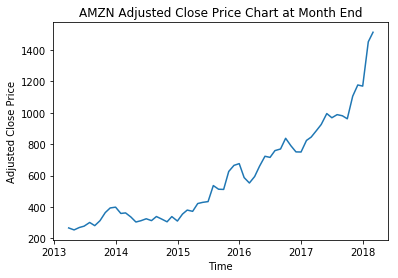

In [14]:
# Plot of AMZN Adjusted Close Prices
plt.plot(amznAdjClose);
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.title('AMZN Adjusted Close Price Chart at Month End')

In [15]:
# Resample FB for the end of the business month and keep it to the adjusted ckis
fbAdjClose = fb['AdjClose'].resample('BM').agg(lambda x: x[-1])
fbAdjClose = fbAdjClose[:60,]
fbAdjClose.head()

Date
2013-03-29    25.580
2013-04-30    27.769
2013-05-31    24.348
2013-06-28    24.880
2013-07-31    36.800
Freq: BM, Name: AdjClose, dtype: float64

Text(0.5, 1.0, 'FB Adjusted Close Price at Month End')

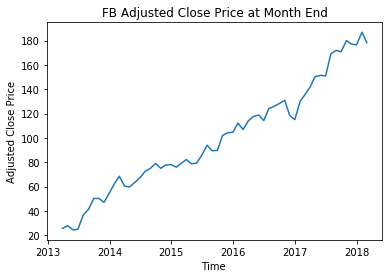

In [16]:
# Plot of FB Adjusted Close Price
plt.plot(fbAdjClose);
plt.xlabel('Time ')
plt.ylabel('Adjusted Close Price')
plt.title('FB Adjusted Close Price at Month End')

In [17]:
# Get IBM Adjusted Close
ibmAdjClose = ibm['AdjClose'].resample('BM').agg(lambda x: x[-1])
ibmAdjClose = ibmAdjClose[:60,]
ibmAdjClose.head()

Date
2013-03-29    184.245939
2013-04-30    174.951582
2013-05-31    180.518558
2013-06-28    165.844157
2013-07-31    169.254589
Freq: BM, Name: AdjClose, dtype: float64

Text(0.5, 1.0, 'IBM Adjusted Close Price at Month End')

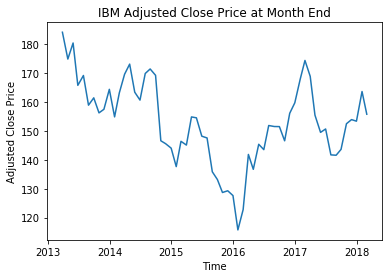

In [18]:
# Plot of IBM Adjusted Close Price
plt.plot(ibmAdjClose);
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.title('IBM Adjusted Close Price at Month End')

In [19]:
# Get MMM Adjusted Close
mmmAdjClose = mmm['AdjClose'].resample('BM').pad()
mmmAdjClose = mmmAdjClose[:60,]
mmmAdjClose.head()

Date
2013-03-29     95.161222
2013-04-30     93.729015
2013-05-31     99.271674
2013-06-28     98.443435
2013-07-31    105.717536
Freq: BM, Name: AdjClose, dtype: float64

Text(0.5, 1.0, 'MMM Adjusted Close Price at Month End')

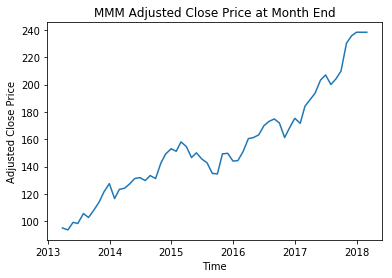

In [20]:
# Plot of MMM Adjusted Price Chart
plt.plot(mmmAdjClose);
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.title('MMM Adjusted Close Price at Month End')

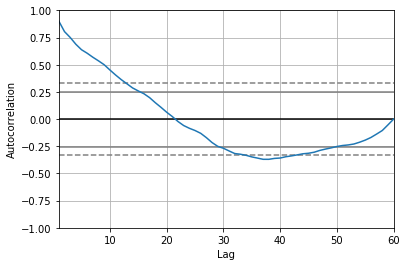

In [21]:
# AMZN Autocorrelation plot
amznAutoPlot = pd.plotting.autocorrelation_plot(amznAdjClose);

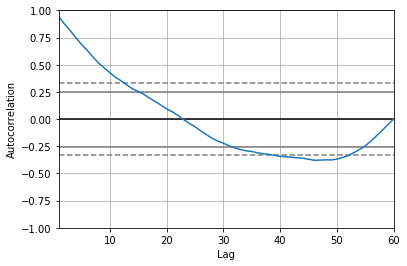

In [22]:
# FB autocorrelation plot
fbAutoPlot = pd.plotting.autocorrelation_plot(fbAdjClose);

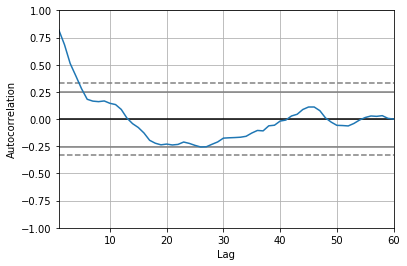

In [23]:
# IBM autocorrelation plot
ibmAutoPlot = pd.plotting.autocorrelation_plot(ibmAdjClose);

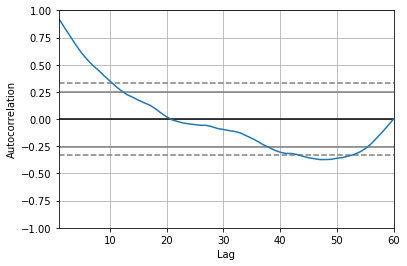

In [24]:
# MMM autocorrelation plot
mmmAutoPlot = pd.plotting.autocorrelation_plot(mmmAdjClose);

What do these plots tell us?

The above plots indicate that there is some autocorrelation. We can rule out it being white noise because there are segments of significant autocorrelation. The plots generally show a decreasing autocorrelation and then move into the test bounds which gives us the indication that it is not really significant from that point. The one that stands out is IBM. Looking at IBM you can see it venturing into this section around lag 5, and then it does not appear to hit into a significant range for the autocorrelation. This is interesting because it gives the appearance of stationarity after the initial periods of autocorrelation. If you look at the price chart, you can see that the price over the 5 years falls, however it is not as big of a change as the other stocks. The price decreases but not enough that it would have huge swings on the mean. This stock is the most stationary out of the lot. All the others enter into the range around lag 10 to lag 15 and then proceed to exit this significance range, and eventually come back within it, indicating that there is additional autocorrelation during those lag periods where it exits. Given that we are dealing with stock price data and we have not accounted for any cyclical trends (for example the correction in 2016), it is not surprising to see some levels of autocorrelation. It is not safe to assume stationarity because the mean and variance are likely to change over time. A good example of this is looking at the price plot for Amazon, you can see that as the price increases, the mean would also be increasing, which would violate stationarity. We also have already ruled out the autocorrelation being white noise which would indicate stationarity.

In [25]:
# getting returns with the shift trick
def monthlyReturns(x):
    return (x / x.shift(1)) - 1

In [26]:
# Get the monthly returns for each of the stocks
amznMonthlyReturns = monthlyReturns(amznAdjClose)
fbMonthlyReturns = monthlyReturns(fbAdjClose)
ibmMonthlyReturns = monthlyReturns(ibmAdjClose)
mmmMonthlyReturns = monthlyReturns(mmmAdjClose)

In [27]:
# A Look at AMZN Monthly Returns
amznMonthlyReturns.head()

Date
2013-03-29         NaN
2013-04-30   -0.047582
2013-05-31    0.060636
2013-06-28    0.031538
2013-07-31    0.084735
Freq: BM, Name: AdjClose, dtype: float64

Text(0.5, 1.0, 'AMZN Monthly Returns')

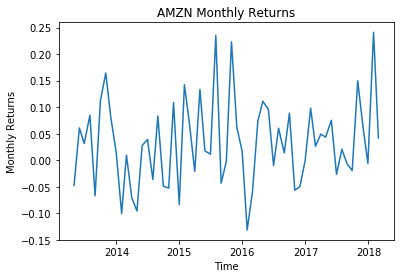

In [28]:
# Plot of AMZN Monthly Returns
plt.plot(amznMonthlyReturns);
plt.xlabel('Time')
plt.ylabel('Monthly Returns')
plt.title('AMZN Monthly Returns')

In [29]:
# A Look at FB Monthly Returns
fbMonthlyReturns.head()

Date
2013-03-29         NaN
2013-04-30    0.085575
2013-05-31   -0.123195
2013-06-28    0.021850
2013-07-31    0.479100
Freq: BM, Name: AdjClose, dtype: float64

Text(0.5, 1.0, 'FB Monthly Returns')

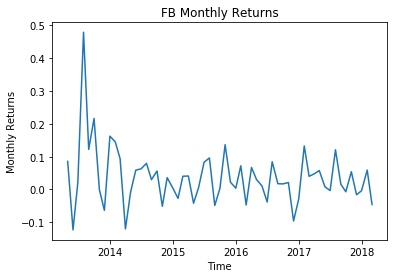

In [30]:
# Plot of FB Monthly Returns
plt.plot(fbMonthlyReturns);
plt.xlabel('Time')
plt.ylabel('Monthly Returns')
plt.title('FB Monthly Returns')

In [31]:
# A Look at IBM Monthly Returns
ibmMonthlyReturns.head()

Date
2013-03-29         NaN
2013-04-30   -0.050445
2013-05-31    0.031820
2013-06-28   -0.081290
2013-07-31    0.020564
Freq: BM, Name: AdjClose, dtype: float64

Text(0.5, 1.0, 'IBM Monthly Returns')

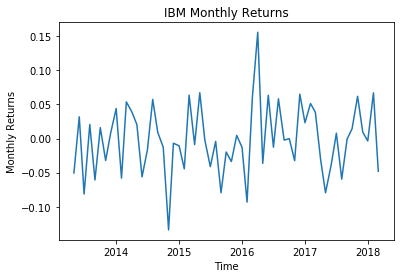

In [32]:
# Plot of IBM Monthly Returns
plt.plot(ibmMonthlyReturns);
plt.xlabel('Time')
plt.ylabel('Monthly Returns')
plt.title('IBM Monthly Returns')

In [33]:
# A Look at MMM Monthly Returns
mmmMonthlyReturns.head()

Date
2013-03-29         NaN
2013-04-30   -0.015050
2013-05-31    0.059135
2013-06-28   -0.008343
2013-07-31    0.073891
Freq: BM, Name: AdjClose, dtype: float64

Text(0.5, 1.0, 'MMM Monthly Returns')

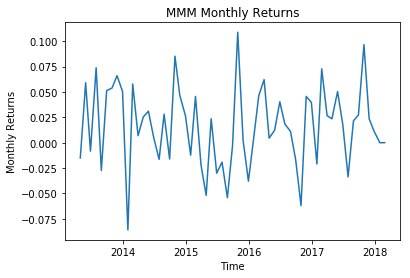

In [34]:
# Plot of MMM Monthly Returns
plt.plot(mmmMonthlyReturns);
plt.xlabel('Time')
plt.ylabel('Monthly Returns')
plt.title('MMM Monthly Returns')

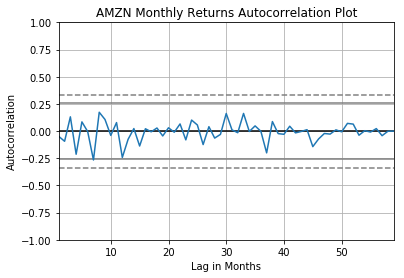

In [35]:
# plot the autocorrelation plot of the monthly returns for AMZN
amznMRplot = pd.plotting.autocorrelation_plot(amznMonthlyReturns.dropna())
amznMRplot.set_title('AMZN Monthly Returns Autocorrelation Plot')
amznMRplot.set_xlabel('Lag in Months')
None

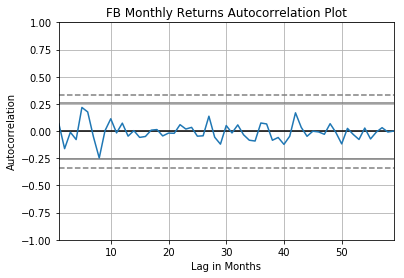

In [36]:
# plot the autocorrelation plot of the monthly returns for FB
fbMRplot = pd.plotting.autocorrelation_plot(fbMonthlyReturns.dropna());
fbMRplot.set_title('FB Monthly Returns Autocorrelation Plot')
fbMRplot.set_xlabel('Lag in Months')
None

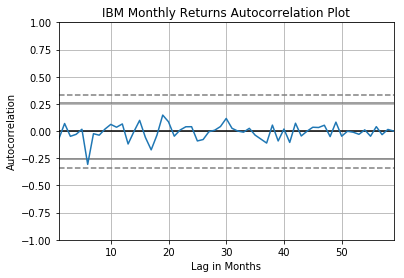

In [37]:
# plot the autocorrelation plot of the monthly returns for IBM
ibmMRplot = pd.plotting.autocorrelation_plot(ibmMonthlyReturns.dropna());
ibmMRplot.set_title('IBM Monthly Returns Autocorrelation Plot')
ibmMRplot.set_xlabel('Lag in Months')
None

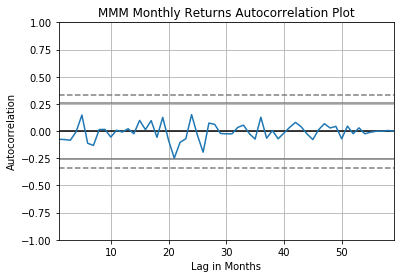

In [38]:
# plot the autocorrelation plot of the monthly returns for MMM
mmmMRplot = pd.plotting.autocorrelation_plot(mmmMonthlyReturns.dropna());
mmmMRplot.set_title('MMM Monthly Returns Autocorrelation Plot')
mmmMRplot.set_xlabel('Lag in Months')
None

What does this plot tell us?

The above plots of the autocorrelation of the monthly returns indicates an insigificant level of autocorrelation. You can see this, because for the most part, the autocorrelation stays within the test bounds indicating that it is not of a significant level. Given that, the autocorrelation looks like white noise and demonstrates characteristics of stationarity. This is in line with expectations. This time we are dealing with monthly returns of the stock which, barring a significant and longer term economic event, you would not expect to see demonstrate a long lasting trend. Having a small amount of autocorrelation tells us that the data does show some levels of momentum, and that there are some minor trends within the stock returns, however on the whole the returns do not significantly correlate from one month to the next. An interesting point to note here is how the autocorrelation changes over the lag periods. As it reaches the 50-60 lag periods, all the stocks have smaller magnitudes of autocorrelation giving the impression of white noise.

In [39]:
# combine the series of the monthly returns into a DataFrame
df = pd.DataFrame(data=[amznMonthlyReturns,fbMonthlyReturns, ibmMonthlyReturns, mmmMonthlyReturns]).T
df.columns = ['AMZN', 'FB', 'IBM', 'MMM']
df.dropna(inplace=True)
df.head()

,AMZN,FB,IBM,MMM
Date,,,,
2013-04-30,-0.047582,0.085575,-0.050445,-0.015050
2013-05-31,0.060636,-0.123195,0.031820,0.059135
2013-06-28,0.031538,0.021850,-0.081290,-0.008343
2013-07-31,0.084735,0.479100,0.020564,0.073891
2013-08-30,-0.067193,0.122120,-0.060765,-0.027370


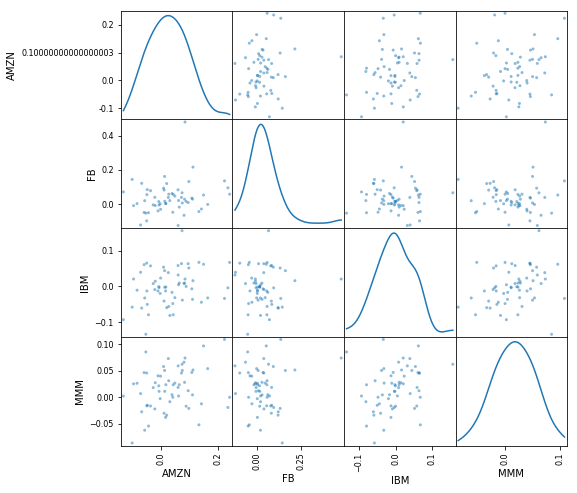

In [40]:
# Plot a Scatter Matrix 
stockScatter = pd.plotting.scatter_matrix(df, figsize=(8,8), diagonal='kde');

What does this plot tell you?

When looking at the Kernel Density Estimations, the means are approximately centered around 0 with a slightly positive or negative skew. An important item to recognize here is that the scales are not the same across the board. So where, AMZN and IBM may have similar skews, the actual returns vary. Both AMZN and IBM have slightly positive skews. FB has a positive skew. MMM is closer to a normal distribution but has the faintest of negative skews. You can also see that the shapes of the plots vary. AMZN and MMM have a standard bell shaped look apart from its skew. FB is narrower, telling us that most of the returns are closer together, and would give off the impression of lower volatility. IBM has a slight bump. This tells us that if we were to bin the data, we could expect two groups that contain majority of the observations and in between there would be a bin with fewer observations.

Looking at the relationships between the stocks, we have 6 scatter plots to look at: AMZN and FB, AMZN and IBM, AMZN and MMM, FB and IBM, FB and MMM, and IBM and MMM.

Three of these scatter plots look to have a weak positive correlation, AMZN and FB, AMZN and MMM, and IBM and MMM. You can see that the data has a slight upwards trend and if you plotted a line of best fit, I would expect you would see it upward sloping.

The FB and IBM relationship and the FB and MMM relationships look more flat based on the scatter plot. It looks like there could be a really weak correlation, but this would likely be an insignificant correlation.

The AMZN and IBM relationship is harder to read. The data looks like it is roughly flat and that there is not a correlation. However, there are also a number of outliers which could impact the correlation. There could be a weak positive correlation between the two, however we would have to plot a line of best fit in order to be sure.

Let's verify what we see using Seaborn's pairplot.

/Users/rahimjiwa/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


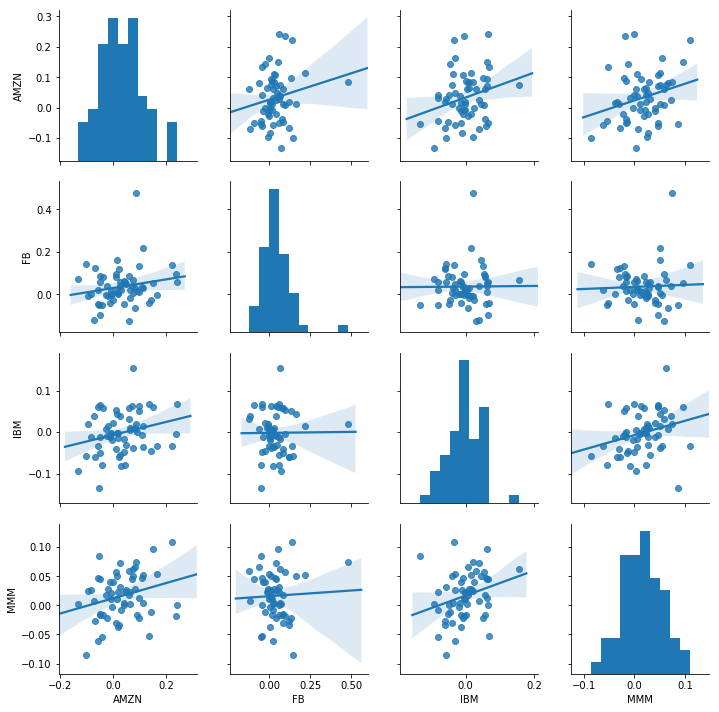

In [41]:
sns.pairplot(df, kind='reg');

Looking at the pairplot, the conclusions that we drew from the scatter plot seem to be fairly accurate. MMM has the closest to a normal distribution. IBM is close to a normal distribution however you have a dip near the 0 mark. This would help explain the bump. With FB you can see that the values are concentrated just to the left of 0. For AMZN you can see that the returns are skewed to the left of the 0. Most of the scatter plots have a weak positive correlation except for FB's correlation with IBM and MMM which are flat. This is in line with what we concluded earlier.